In [86]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [87]:
# Import dataset 
df=pd.read_csv('Boston-house-price-data.csv')

In [88]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [89]:
# Renaming columns to be more understandable
df.columns=['CrimeRate','ResLandZone','NonRetailBusAcres','CharlesRiver',
            'NOX','AvgRooms','OlderUnitsPercent','EmpDist','HighwayAccessIndex',
            'PropTaxRate','PupilTeacherRatio','BlackPop','LowerStatPopPercent','MedianHomeVal']

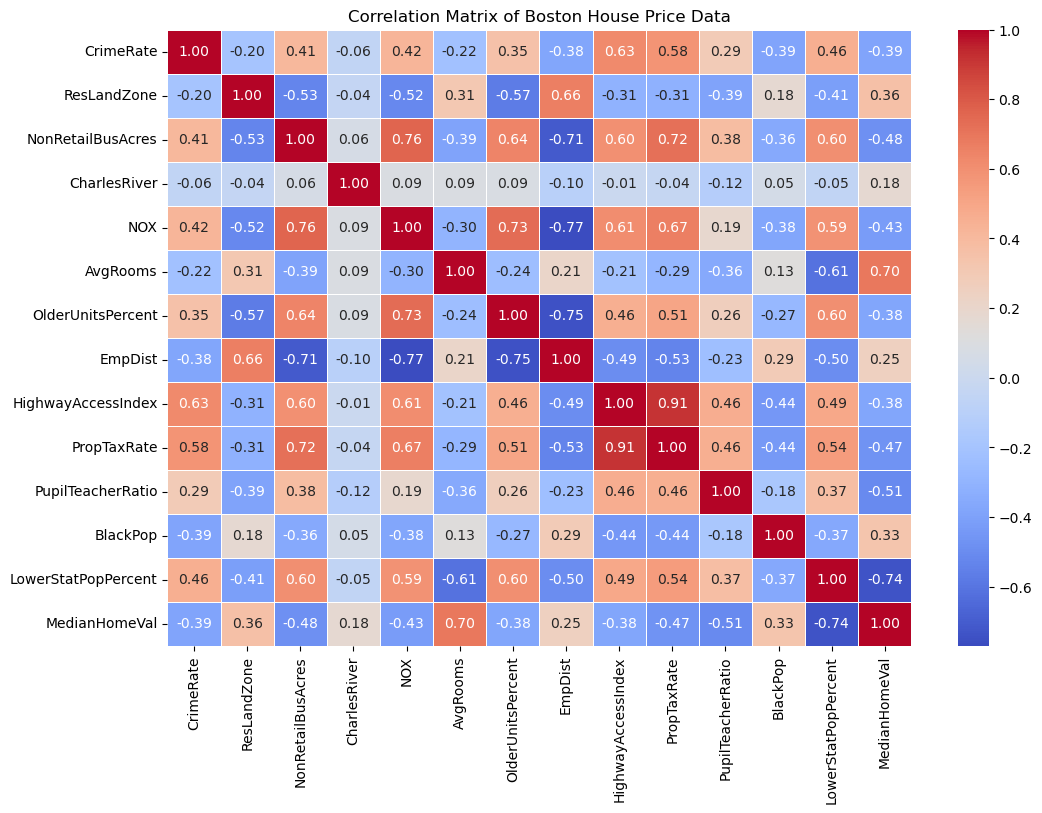

LowerStatPopPercent   -0.737663
PupilTeacherRatio     -0.507787
NonRetailBusAcres     -0.483725
PropTaxRate           -0.468536
NOX                   -0.427321
CrimeRate             -0.388305
HighwayAccessIndex    -0.381626
OlderUnitsPercent     -0.376955
CharlesRiver           0.175260
EmpDist                0.249929
BlackPop               0.333461
ResLandZone            0.360445
AvgRooms               0.695360
Name: MedianHomeVal, dtype: float64

In [90]:
# Running correlation matrix analysis
correlation_matrix = df.corr()

# Visualizing correlation matrix to identify highly correlated features
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Boston House Price Data")
plt.show()

# Display correlations of features with the target variable 'MedianHomeValue' to identify weakly correlated ones
target_correlation = correlation_matrix['MedianHomeVal'].drop('MedianHomeVal').sort_values()
target_correlation

In [91]:
# Dropping columns with weak correlation to target variable
df.drop(['CharlesRiver', 'EmpDist'], axis=1, inplace=True)

# Display the first few rows to confirm changes
df.head()

,CrimeRate,ResLandZone,NonRetailBusAcres,NOX,AvgRooms,OlderUnitsPercent,HighwayAccessIndex,PropTaxRate,PupilTeacherRatio,BlackPop,LowerStatPopPercent,MedianHomeVal
0,0.00632,18.0,2.31,0.538,6.575,65.2,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,3,222.0,18.7,396.90,5.33,36.2


In [92]:
# Looking for missing values
missing_vals=df.isnull().sum()
missing_vals

CrimeRate              0
ResLandZone            0
NonRetailBusAcres      0
NOX                    0
AvgRooms               0
OlderUnitsPercent      0
HighwayAccessIndex     0
PropTaxRate            0
PupilTeacherRatio      0
BlackPop               0
LowerStatPopPercent    0
MedianHomeVal          0
dtype: int64

In [93]:
# 1. Regression Models to predict the prices of the house
# Split data for regression into training(70%) and testing(30%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression

In [94]:
# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on the testing set
y_pred_lr = lr.predict(X_test)

# Evaluate the Linear Regression model
print("Linear Regression Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R^2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Mean Squared Error: 21.517444231177038
Linear Regression R^2 Score: 0.7112260057484956


# Random Forest Regressor

In [95]:
# Initialize and train the Random Forest Regressor
rfr = RandomForestRegressor(n_estimators=1000, random_state=42)
rfr.fit(X_train, y_train)

# Predict on the testing set
y_pred_rfr = rfr.predict(X_test)

# Evaluate the Random Forest Regressor
print("Random Forest Regressor Mean Squared Error:", mean_squared_error(y_test, y_pred_rfr))
print("Random Forest Regressor R^2 Score:", r2_score(y_test, y_pred_rfr))


Random Forest Regressor Mean Squared Error: 9.238406563815797
Random Forest Regressor R^2 Score: 0.876016336545817


# Gradient Boosting Regressor

In [96]:
# Initialize and train the Random Forest Regressor
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Predict on the testing set
y_pred_gbr = gbr.predict(X_test)

# Evaluate the Gradient Boosting Regressor
print("Gradient Boosting Regressor Mean Squared Error:", mean_squared_error(y_test, y_pred_gbr))
print("Gradient Boosting Regressor R^2 Score:", r2_score(y_test, y_pred_gbr))

Gradient Boosting Regressor Mean Squared Error: 7.811529563068309
Gradient Boosting Regressor R^2 Score: 0.8951656819041491


# Ridge, Lasso & Elastic Net

In [97]:
# L2 Regularization: Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
print("Ridge Mean Squared Error:", mean_squared_error(y_test, ridge_pred))
print("Ridge R^2 Score:", r2_score(y_test, ridge_pred))

# L1 Regularization: Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
print("Lasso Mean Squared Error:", mean_squared_error(y_test, lasso_pred))
print("Lasso R^2 Score:", r2_score(y_test, lasso_pred))

# L1 + L2 Regularization: Elastic Net
elastic= ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train, y_train)
elastic_pred = elastic.predict(X_test)
print("Elastic Net Mean Squared Error:", mean_squared_error(y_test, elastic_pred))
print("Elastic Net R^2 Score:", r2_score(y_test, elastic_pred))

Ridge Mean Squared Error: 22.044053089861
Ridge R^2 Score: 0.7041586727559437
Lasso Mean Squared Error: 22.96383361575593
Lasso R^2 Score: 0.6918147952283057
Elastic Net Mean Squared Error: 22.9266128111671
Elastic Net R^2 Score: 0.6923143155381943


# Conclusion:
The R^2 scores are: <br>
Linear Regression: 0.711 <br>
Random Forest Regressor: 0.876 <br>
Gradient Boosting Regressor: 0.895 <br>
Ridge: 0.704 <br>
Lasso: 0.691 <br>
Elastic Net: 0.692 <br>
<br>
In Regression model, Gradient Boosting Regressor is the best model with R^2 score of 0.89.